In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Python models for working with statistics
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

In [5]:
data = pd.read_csv('AI_index_db.csv')
df=pd.DataFrame(data)
df.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy


# Desciptive Statistics

In [6]:
df.describe()

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,16.803065,63.503710,66.925484,16.610000,14.824677,57.865645,6.171935,23.914677
std,15.214963,20.217525,20.000424,17.413996,19.419279,26.252448,14.029632,15.123586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.365000,55.857500,58.107500,3.032500,1.202500,41.030000,0.697500,14.805000
50%,13.445000,65.230000,69.505000,12.930000,9.005000,63.930000,2.585000,23.220000
75%,24.567500,75.947500,80.500000,25.412500,19.980000,77.952500,5.307500,30.487500
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [7]:
# You can also use describe for categorical data
df[['Country', 'Region', 'Cluster','Income group', 'Political regime']].describe()

,Country,Region,Cluster,Income group,Political regime
count,62,62,62,62,62
unique,62,5,5,3,4
top,United States of America,Europe,Waking up,High,Liberal democracy
freq,1,29,40,43,27


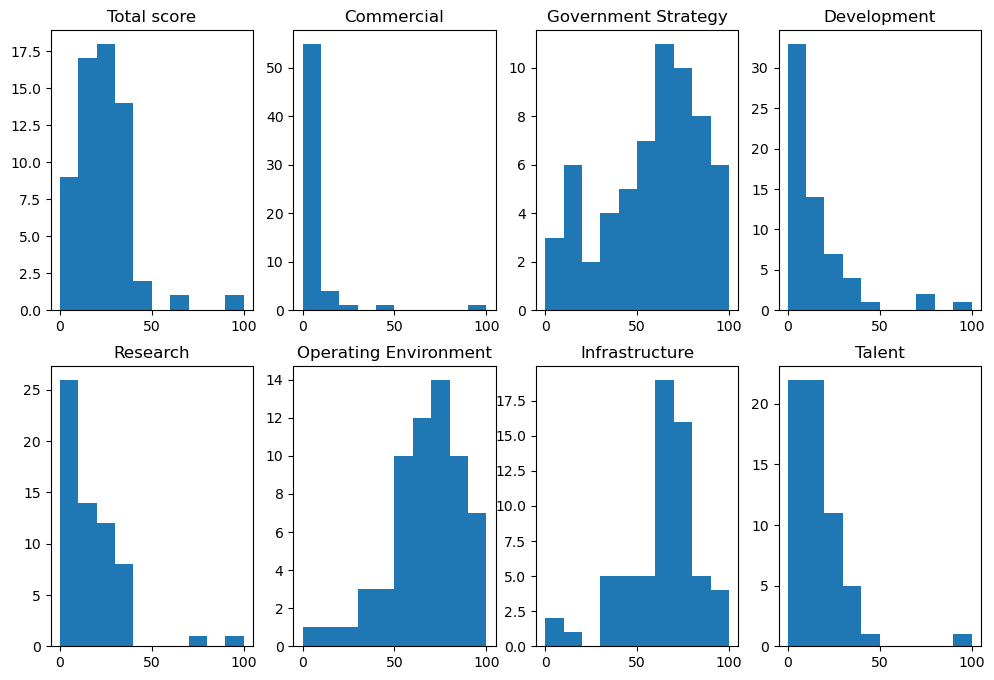

In [8]:
fig, axs = plt.subplots(2,4,figsize=(12,8))
name=['Talent' ,'Infrastructure' ,'Operating Environment' ,'Research' ,'Development' ,'Government Strategy' ,'Commercial' ,'Total score']
for i in range(2):
    for n in range(4):
        for na in name:
            df_plot=na
        axs[i,n].hist(df[na])
        axs[i,n].set_title(na)
        name.remove(na)

In [9]:
# Now, let's compute some foundational concepts of continuous probability statistics
name=['Talent' ,'Infrastructure' ,'Operating Environment' ,'Research' ,'Development' ,'Government Strategy' ,'Commercial' ,'Total score']
for na in name:
    mean = df[na].mean()
    std = df[na].std()
    zs = stats.zscore(df[na])
    print(f'Mean of the {na} dataset is {mean}')
    print(f'Standard Deviation of the {na} dataset is {std}')
    print(f'Z-score of the {na} dataset is {zs}')
    print('---------------------------------------------------------')


Mean of the Talent dataset is 16.803064516129034
Standard Deviation of the Talent dataset is 15.214962608435725
Z-score of the Talent dataset is 0     5.512738
1    -0.019419
2     1.513868
3     0.959261
4     1.256111
        ...   
57   -0.697935
58   -1.039843
59   -1.063697
60   -0.931837
61   -0.583303
Name: Talent, Length: 62, dtype: float64
---------------------------------------------------------
Mean of the Infrastructure dataset is 63.503709677419366
Standard Deviation of the Infrastructure dataset is 20.21752487922792
Z-score of the Infrastructure dataset is 0     1.521720
1     1.819917
2     0.395251
3     0.675497
4     0.203268
        ...   
57   -1.439312
58   -1.229876
59   -2.463058
60   -3.166664
61   -3.045490
Name: Infrastructure, Length: 62, dtype: float64
---------------------------------------------------------
Mean of the Operating Environment dataset is 66.92548387096774
Standard Deviation of the Operating Environment dataset is 20.00042373956189
Z-score of 

In [24]:
# Let's practice sample distribution with the sample() function
# sampling with replacement is when a population element can be selected > 1 time
# a random seed is a starting point for creating random numbers
# Having learnt that the mean of a sample will most resemble its population mean when the sample records reach about 10% of the pupulation size.
n=int(10/100*len(df))
sample_data = df.sample(n=n, replace=True, random_state=100)
sample_data

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
8,Germany,27.63,77.22,70.22,35.84,24.79,84.65,8.29,36.04,Europe,Traditional champions,High,Liberal democracy
24,Norway,27.61,76.20,36.65,21.18,13.56,59.05,3.95,25.77,Europe,Waking up,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
39,Greece,7.62,55.44,83.58,15.12,2.21,22.15,0.92,17.33,Europe,Waking up,High,Liberal democracy
23,Taiwan,12.34,77.86,56.67,25.71,19.99,55.97,2.53,25.79,Asia-Pacific,Waking up,High,Liberal democracy
15,Japan,15.18,84.58,57.53,22.51,34.47,71.96,7.31,30.53,Asia-Pacific,Rising stars,High,Liberal democracy


In [23]:
# Now. let's compute the sample mean
estimate1=sample_data['Total score'].mean()
estimate1 # this is the point estimate of the sample

29.275000000000002

In [48]:
# Now, lets collect more estimate to plot a sample distribution histogram
estimates=[]
for i in range(1000):
    estimates.append(df.sample(n=n,replace=True)['Total score'].mean())
estimate_df=pd.DataFrame(estimates, columns=['estimate']).reset_index().rename(columns={'index':'n'})
estimate_df

,n,estimate
0,0,26.790000
1,1,15.635000
2,2,33.428333
3,3,29.283333
4,4,26.708333
...,...,...
995,995,15.001667
996,996,22.130000
997,997,30.121667
998,998,27.860000


<AxesSubplot:ylabel='Density'>

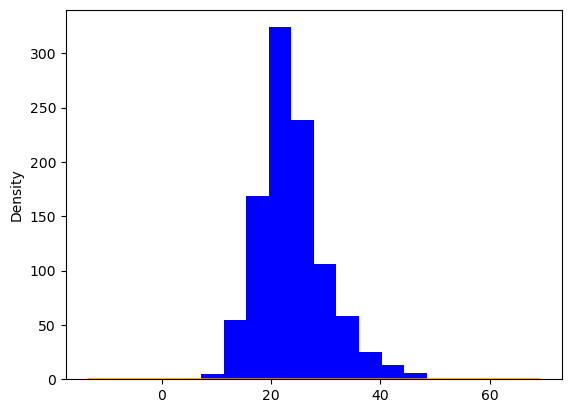

In [90]:
estimate_df['estimate'].hist(color='blue')

C:\Users\AD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='estimate', ylabel='Density'>

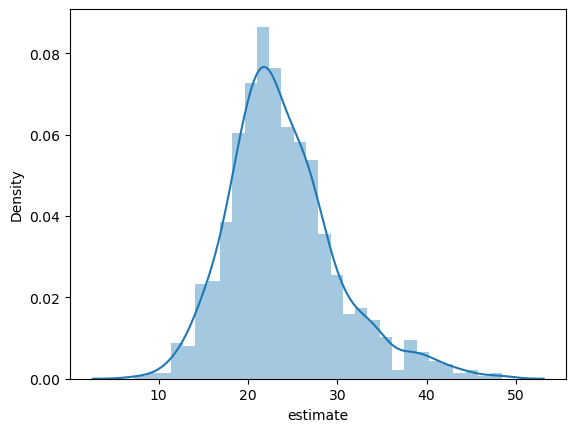

In [103]:
sns.distplot(estimate_df['estimate'])